In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
import numpy as np
import pandas as pd
# import seaborn as sns

import hyperparameters as hp
from iridia_af.record import Record, create_record

In [4]:
metadata_df = pd.read_csv(hp.METADATA_PATH)

In [5]:
num_patients = len(metadata_df["patient_id"].unique())
print(f"Number of patients: {num_patients}")

Number of patients: 152


In [6]:
num_records = len(metadata_df["record_id"].unique())
print(f"Number of records: {num_records}")

Number of records: 167


In [7]:
min_duration = metadata_df["record_seconds"].min()
max_duration = metadata_df["record_seconds"].max()
print(f"Min duration: {min_duration}, max duration: {max_duration}")

Min duration: 71408, max duration: 345596
Min duration: 19 hours, max duration: 95 hours


In [9]:
total_samples = metadata_df["record_samples"].sum()
total_seconds = int(total_samples / hp.SAMPLE_RATE)
print(f"Total samples: {total_samples}, total seconds: {total_seconds}")

Total samples: 4817142716, total seconds: 24085713


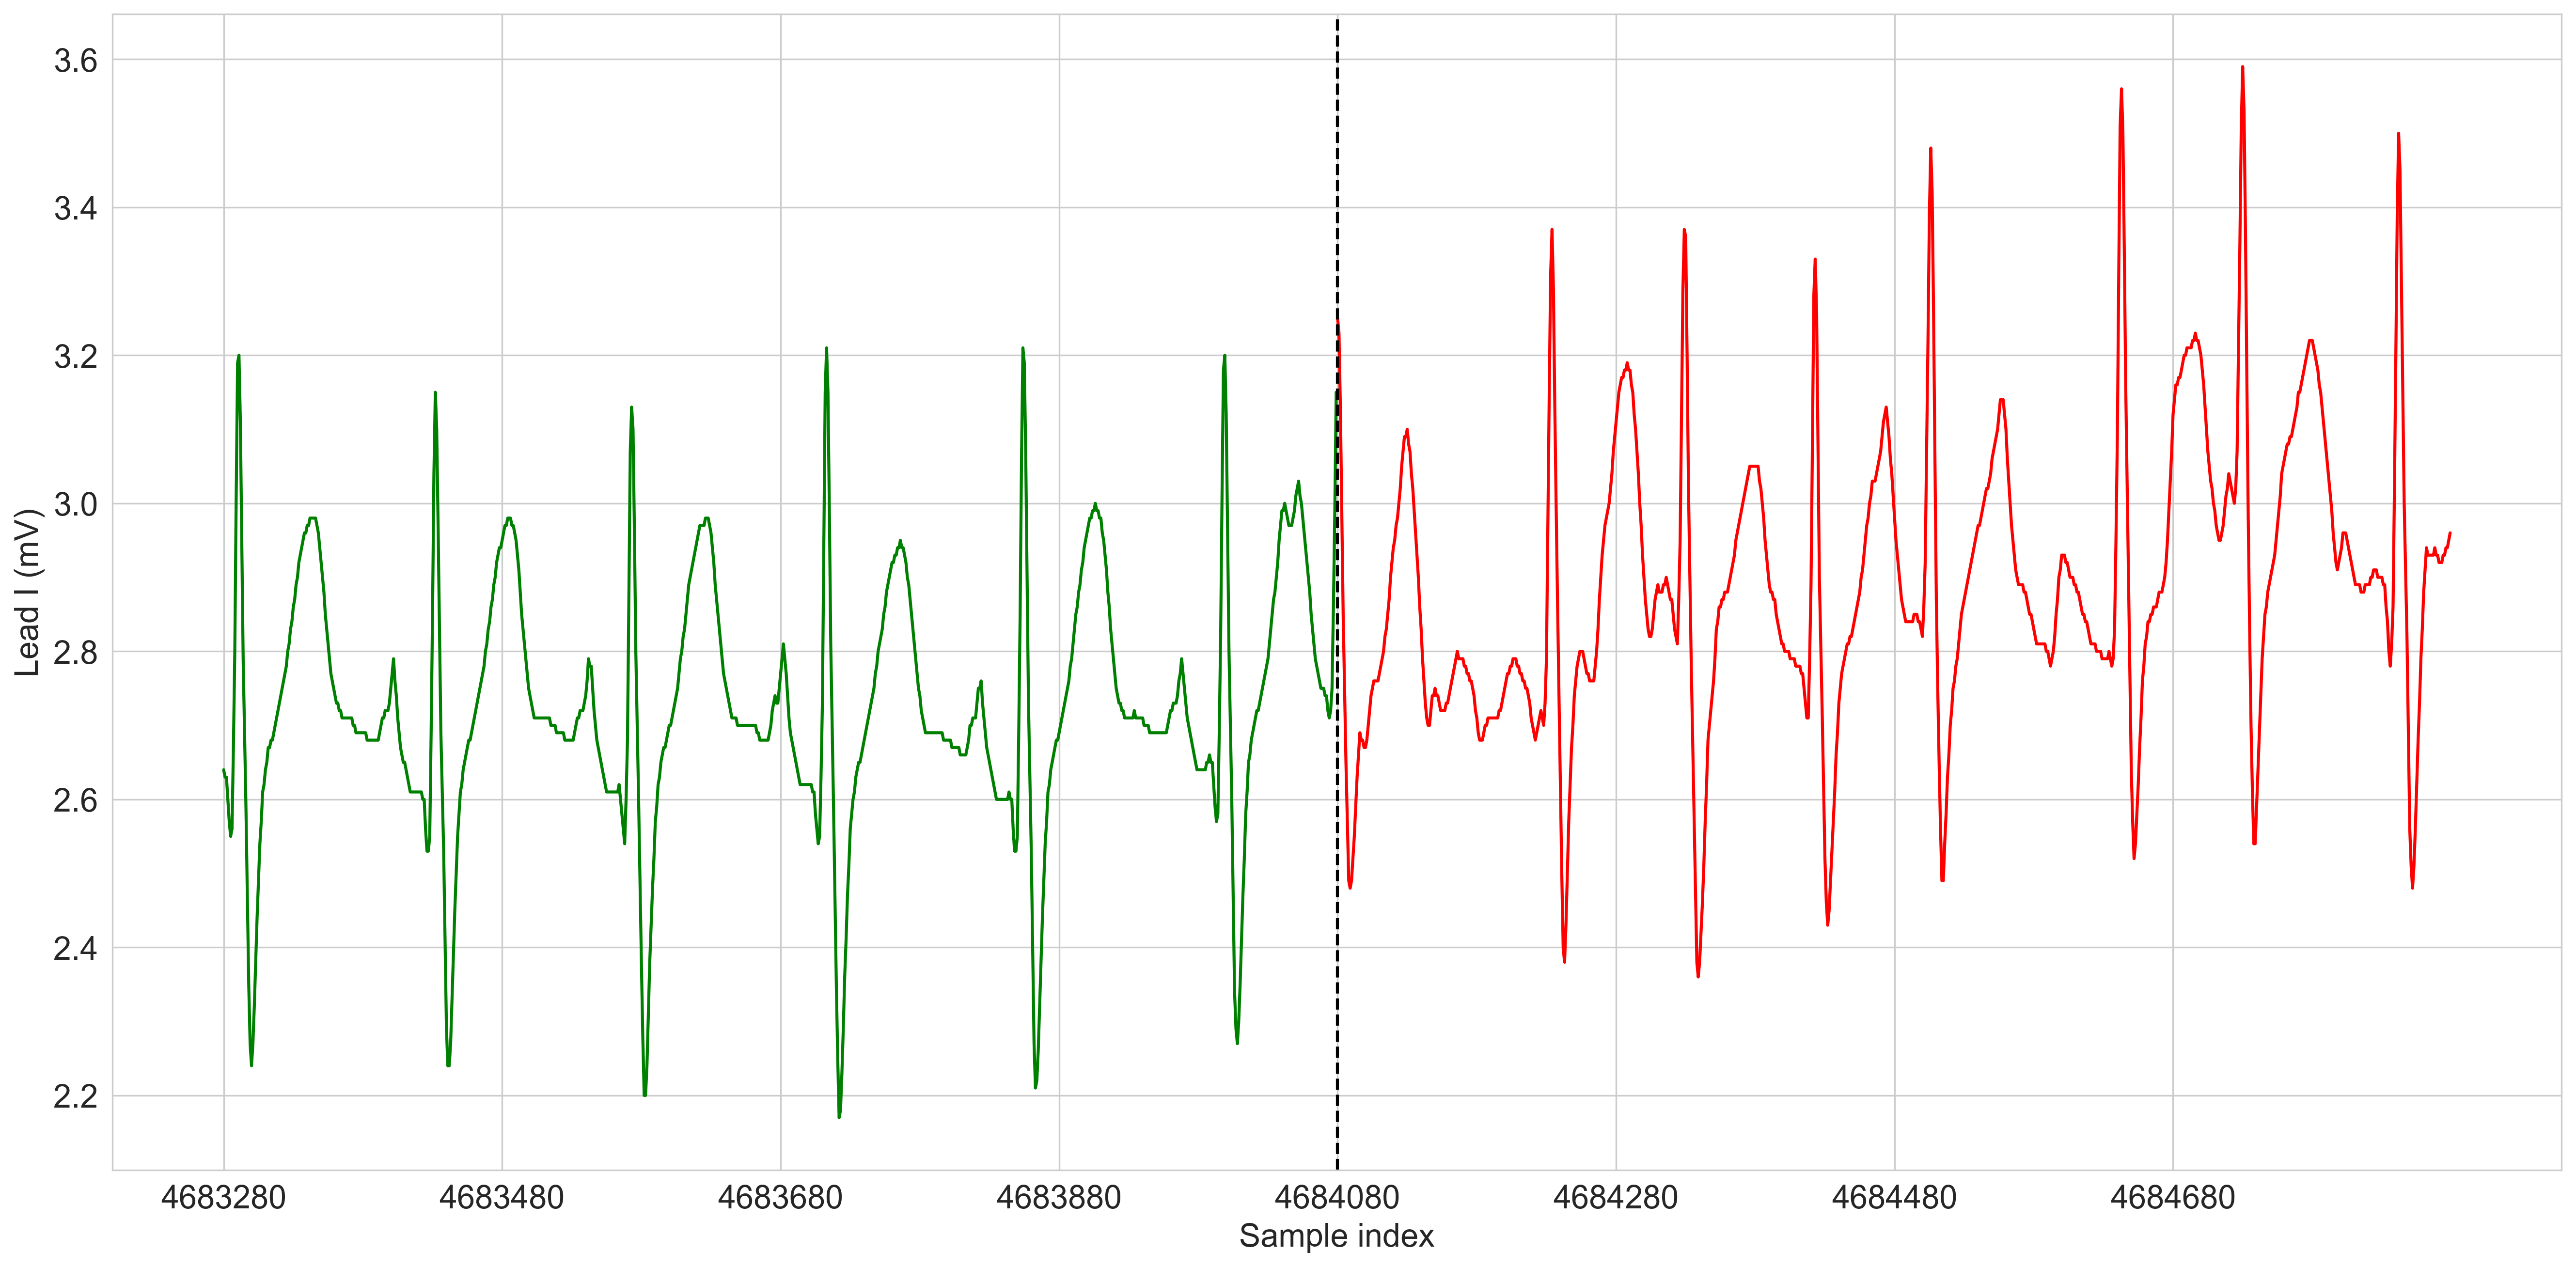

In [10]:
record = create_record("record_026", metadata_df, hp.RECORDS_PATH)
record.load_ecg()

plt.figure(figsize=(18, 9))
plt.rcParams.update({'font.size': 16})
shift = 4 * 200
event_index = record.ecg_labels_df.iloc[0].start_qrs_index
af_data = record.ecg[0][event_index - shift:event_index + shift, 0]
af_before = np.copy(af_data)
af_before[shift:] = np.nan
af_after = np.copy(af_data)
af_after[:shift] = np.nan

plt.plot(af_before, color="green")
plt.plot(af_after, color="red")
plt.ylabel("Lead I (mV)")
plt.xlabel("Sample index")
plt.axvline(x=shift, color="black", linestyle="--")
xticks_labels = [str(i) for i in range(event_index - shift, event_index + shift, 200)]
plt.xticks(range(0, len(af_data), 200), xticks_labels)
plt.tight_layout()

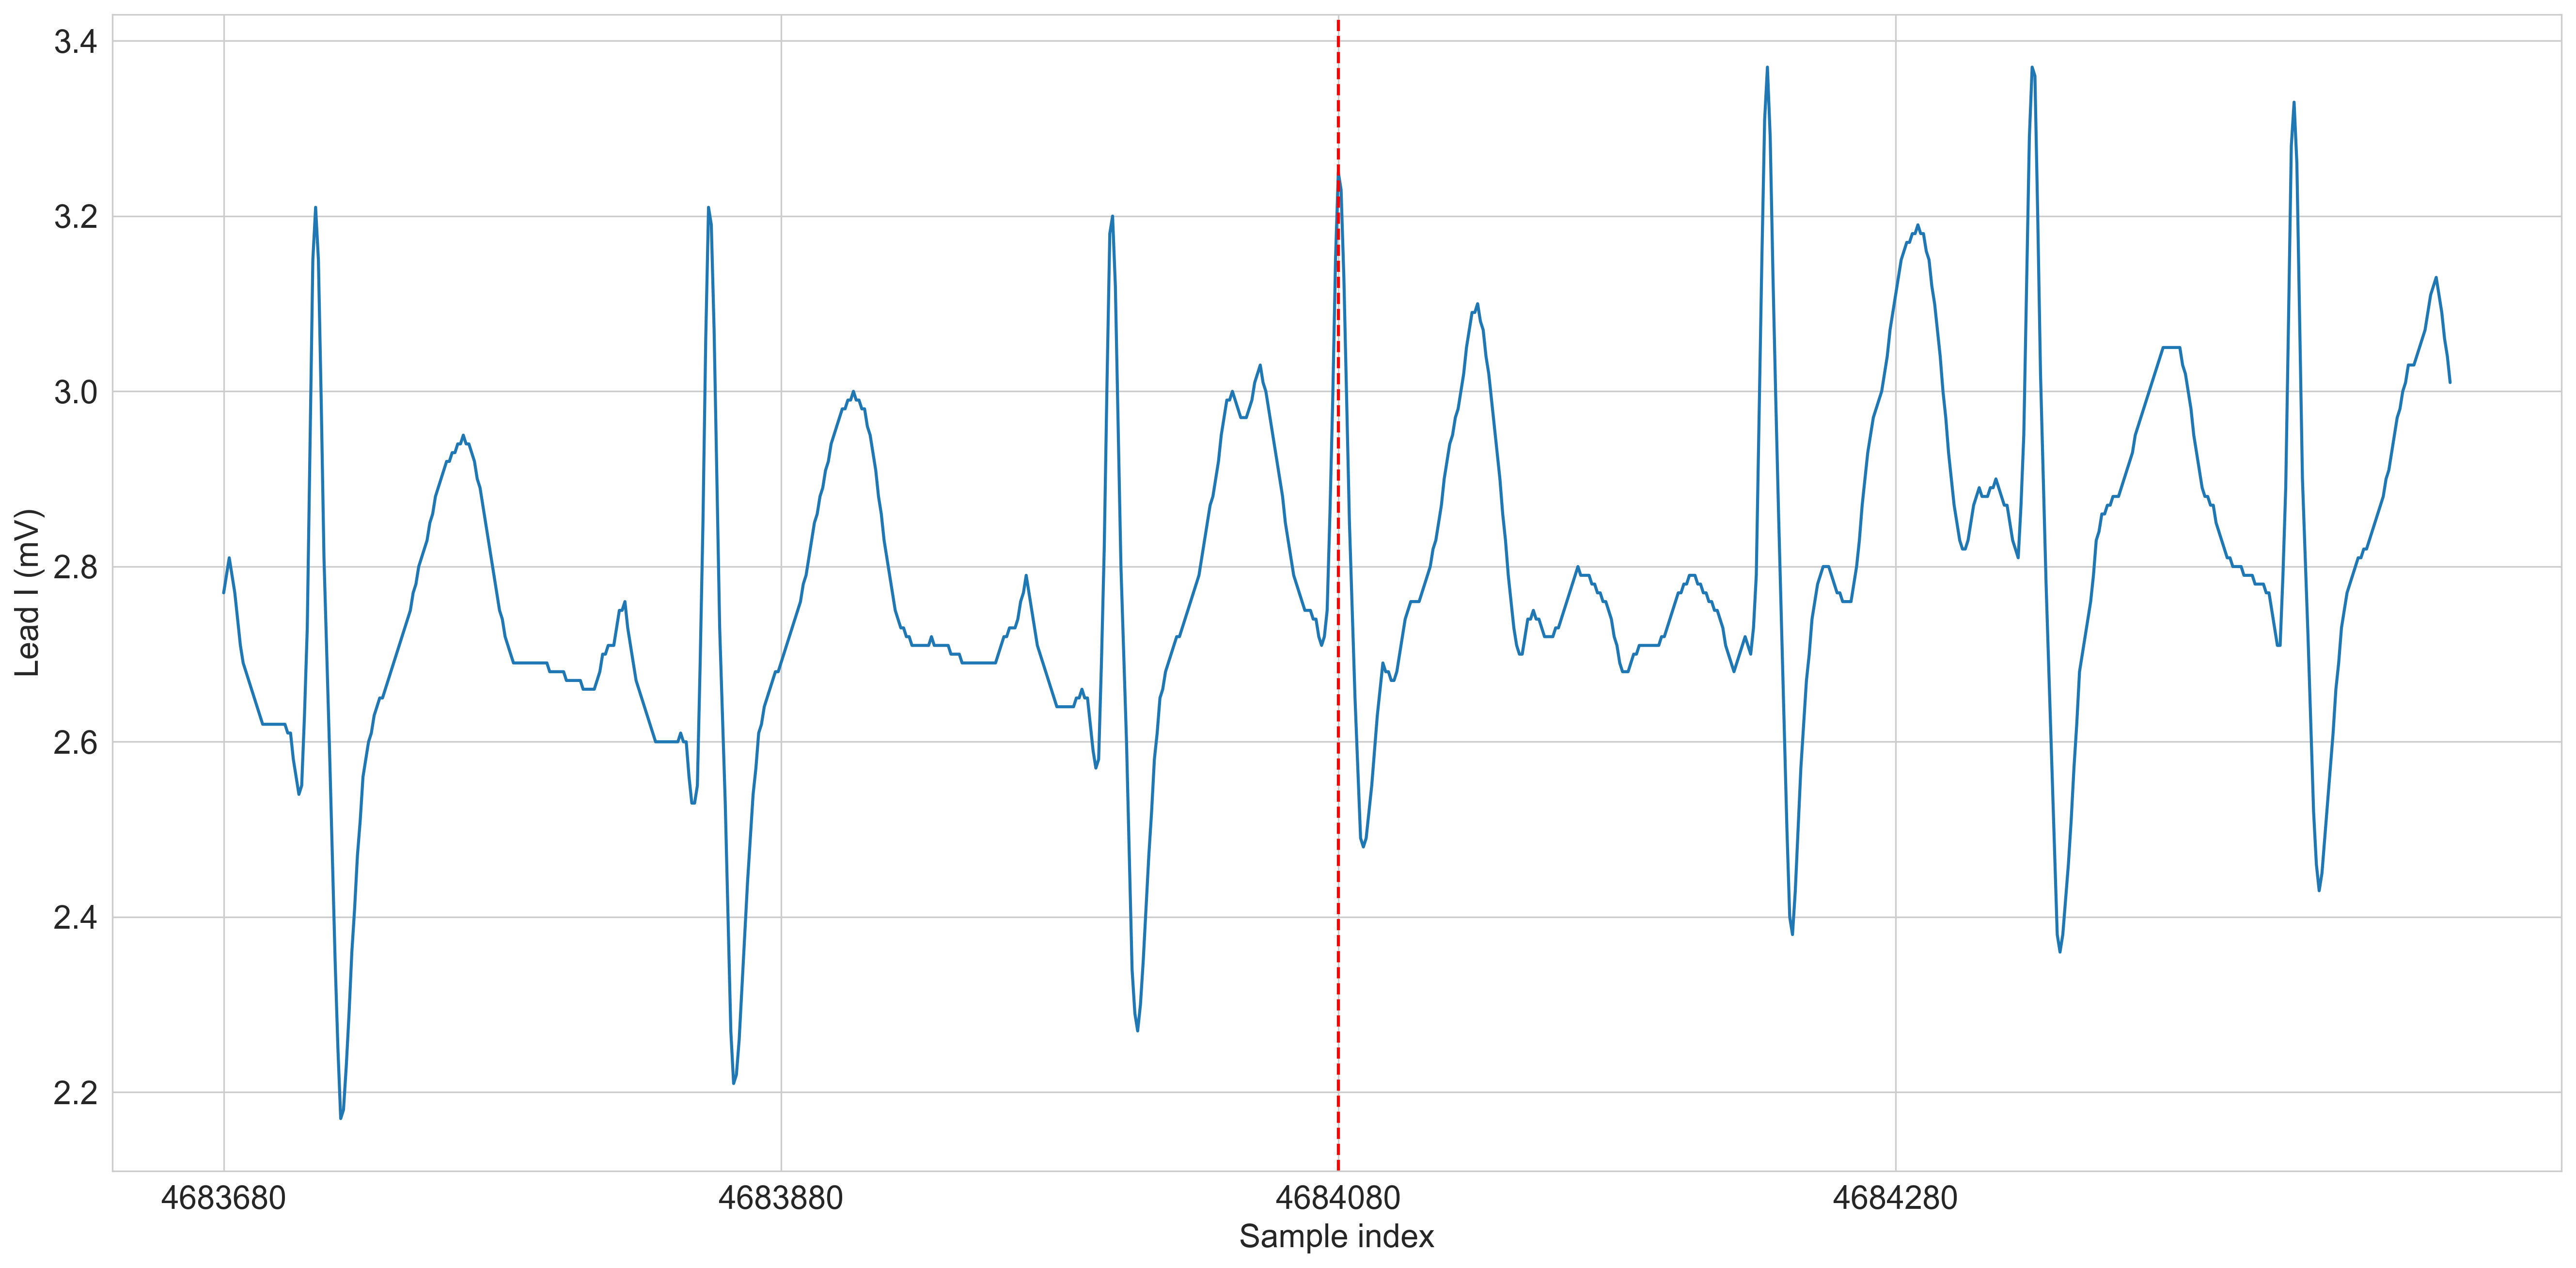

In [11]:
record = create_record("record_026", metadata_df, hp.RECORDS_PATH)
record.load_ecg()

plt.figure(figsize=(18, 9))
plt.rcParams.update({'font.size': 16})
shift = 2 * 200
event_index = record.ecg_labels_df.iloc[0].start_qrs_index
af_data = record.ecg[0][event_index - shift:event_index + shift, 0]

plt.plot(af_data)
plt.ylabel("Lead I (mV)")
plt.xlabel("Sample index")
plt.axvline(x=shift, color="red", linestyle="--")
xticks_labels = [str(i) for i in range(event_index - shift, event_index + shift, 200)]
plt.xticks(range(0, len(af_data), 200), xticks_labels)
plt.tight_layout()

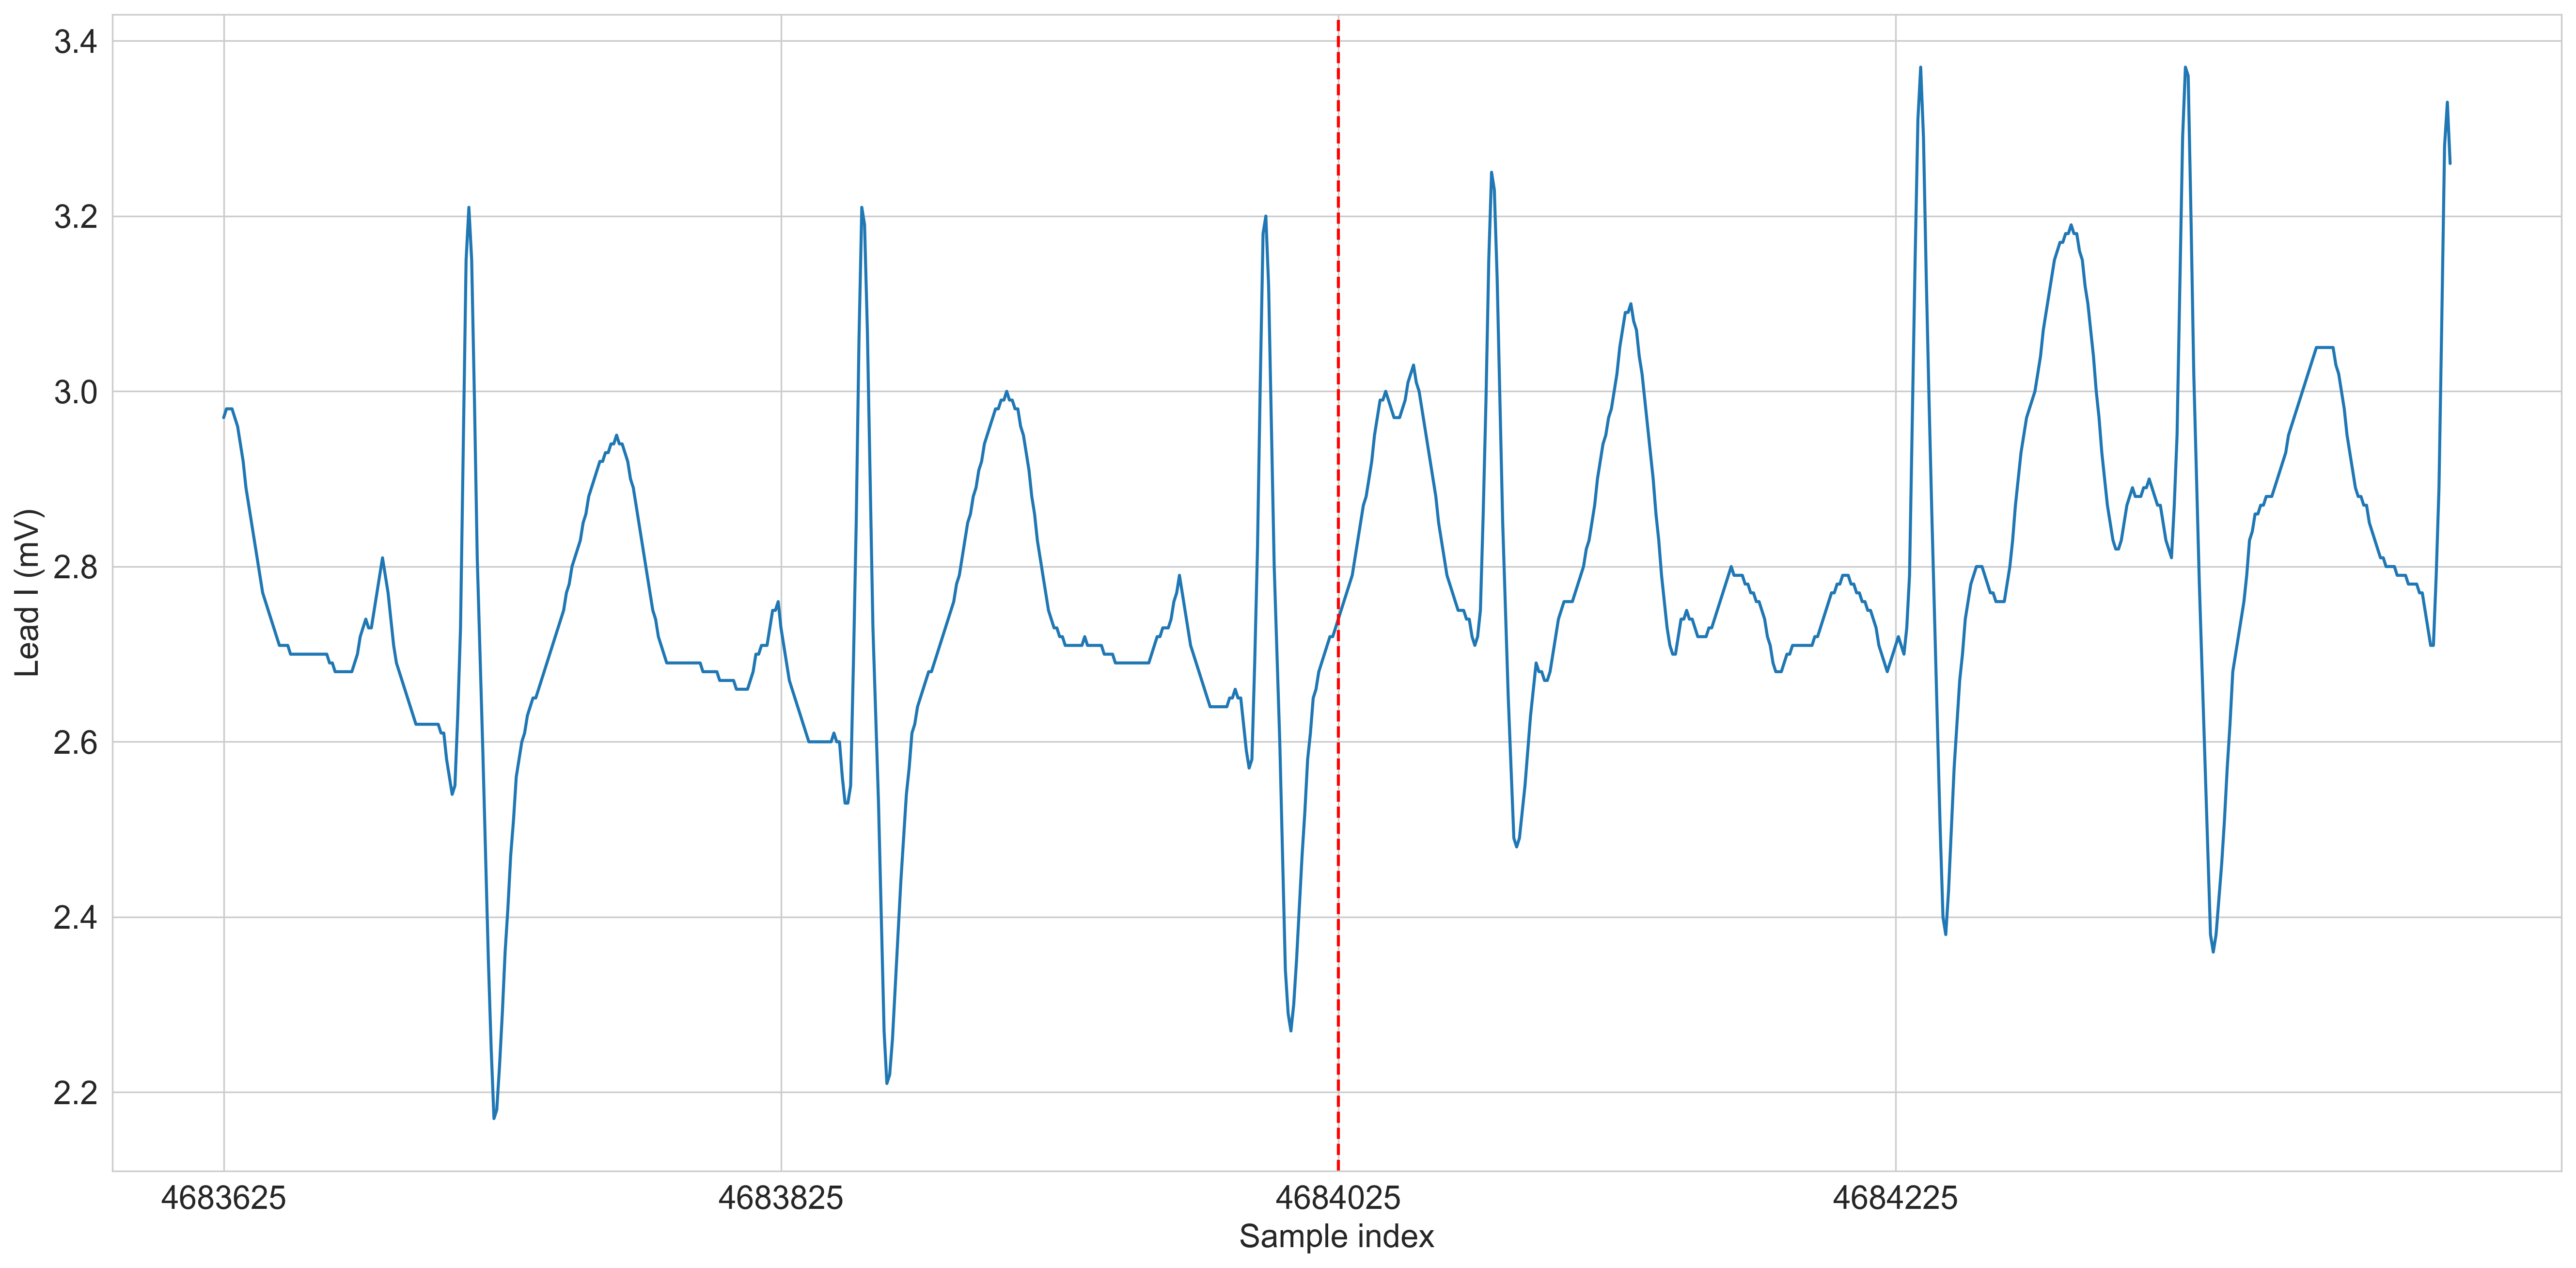

In [12]:
record = create_record("record_026", metadata_df, hp.RECORDS_PATH)
record.load_ecg()

plt.figure(figsize=(18, 9))
plt.rcParams.update({'font.size': 16})
shift = 2 * 200
event_index = record.ecg_labels_df.iloc[0].start_qrs_index
correction = 55
event_index -= correction
af_data = record.ecg[0][event_index - shift:event_index + shift, 0]

plt.plot(af_data)
plt.ylabel("Lead I (mV)")
plt.xlabel("Sample index")
plt.axvline(x=shift, color="red", linestyle="--")
xticks_labels = [str(i) for i in range(event_index - shift, event_index + shift, 200)]
plt.xticks(range(0, len(af_data), 200), xticks_labels)
plt.tight_layout()

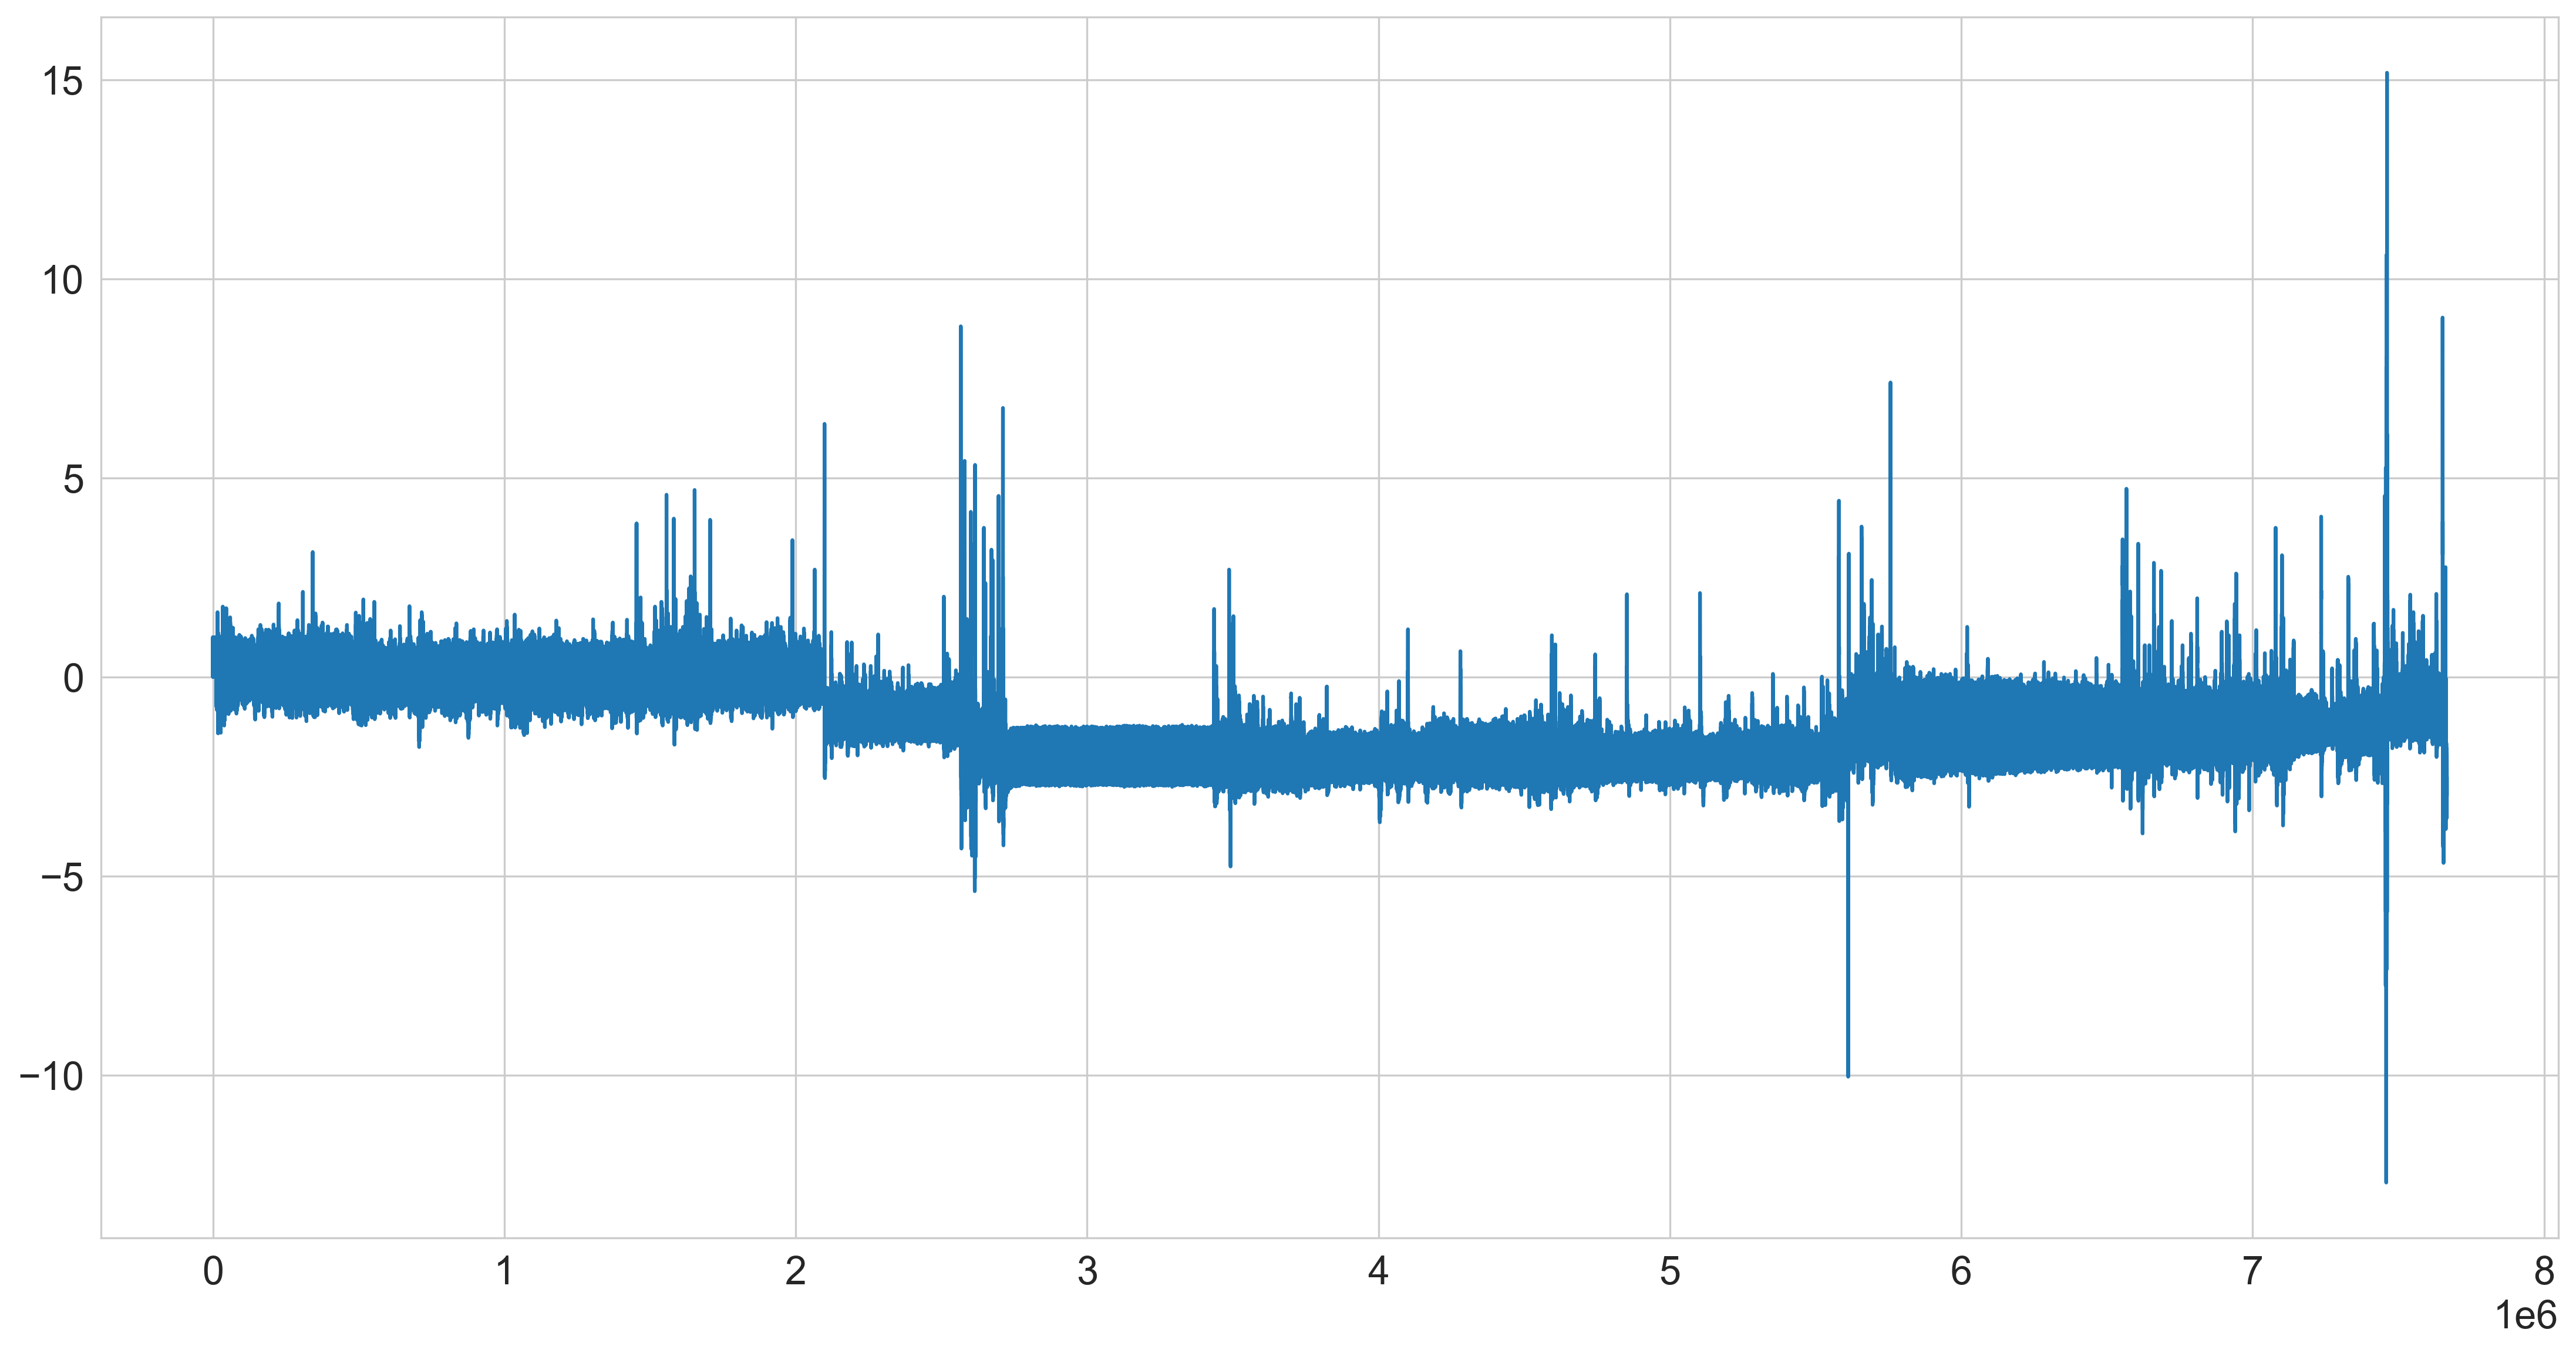

In [13]:
# record has been cleaned, therefore the end is not available
record = create_record("record_142", metadata_df, hp.RECORDS_PATH)
record.load_ecg()

plt.figure(figsize=(18, 9))
plt.rcParams.update({'font.size': 16})
plt.plot(record.ecg[1][:, 0])

In [15]:
sns.set_style('white')
sns.set_context('notebook')
sns.set(rc={"figure.dpi": 300})
sns.set_style("whitegrid")

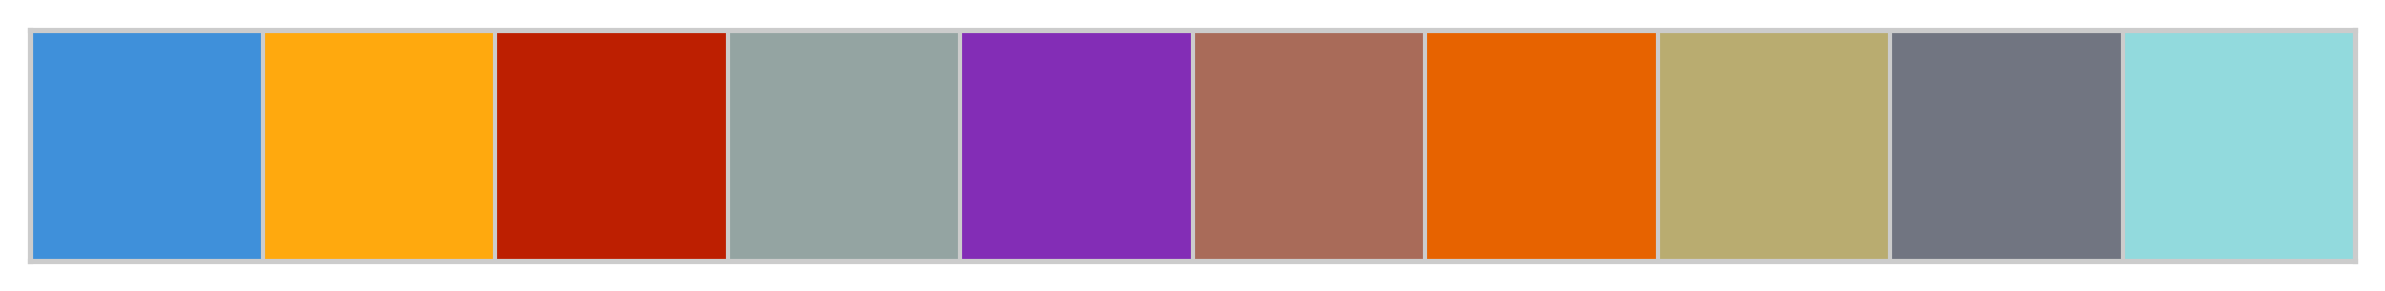

In [16]:
PETROFF2021 = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581",
               "#92dadd"]
sns.set_palette(PETROFF2021)
sns.palplot(PETROFF2021)

Text(0, 0.5, 'Number of patients')

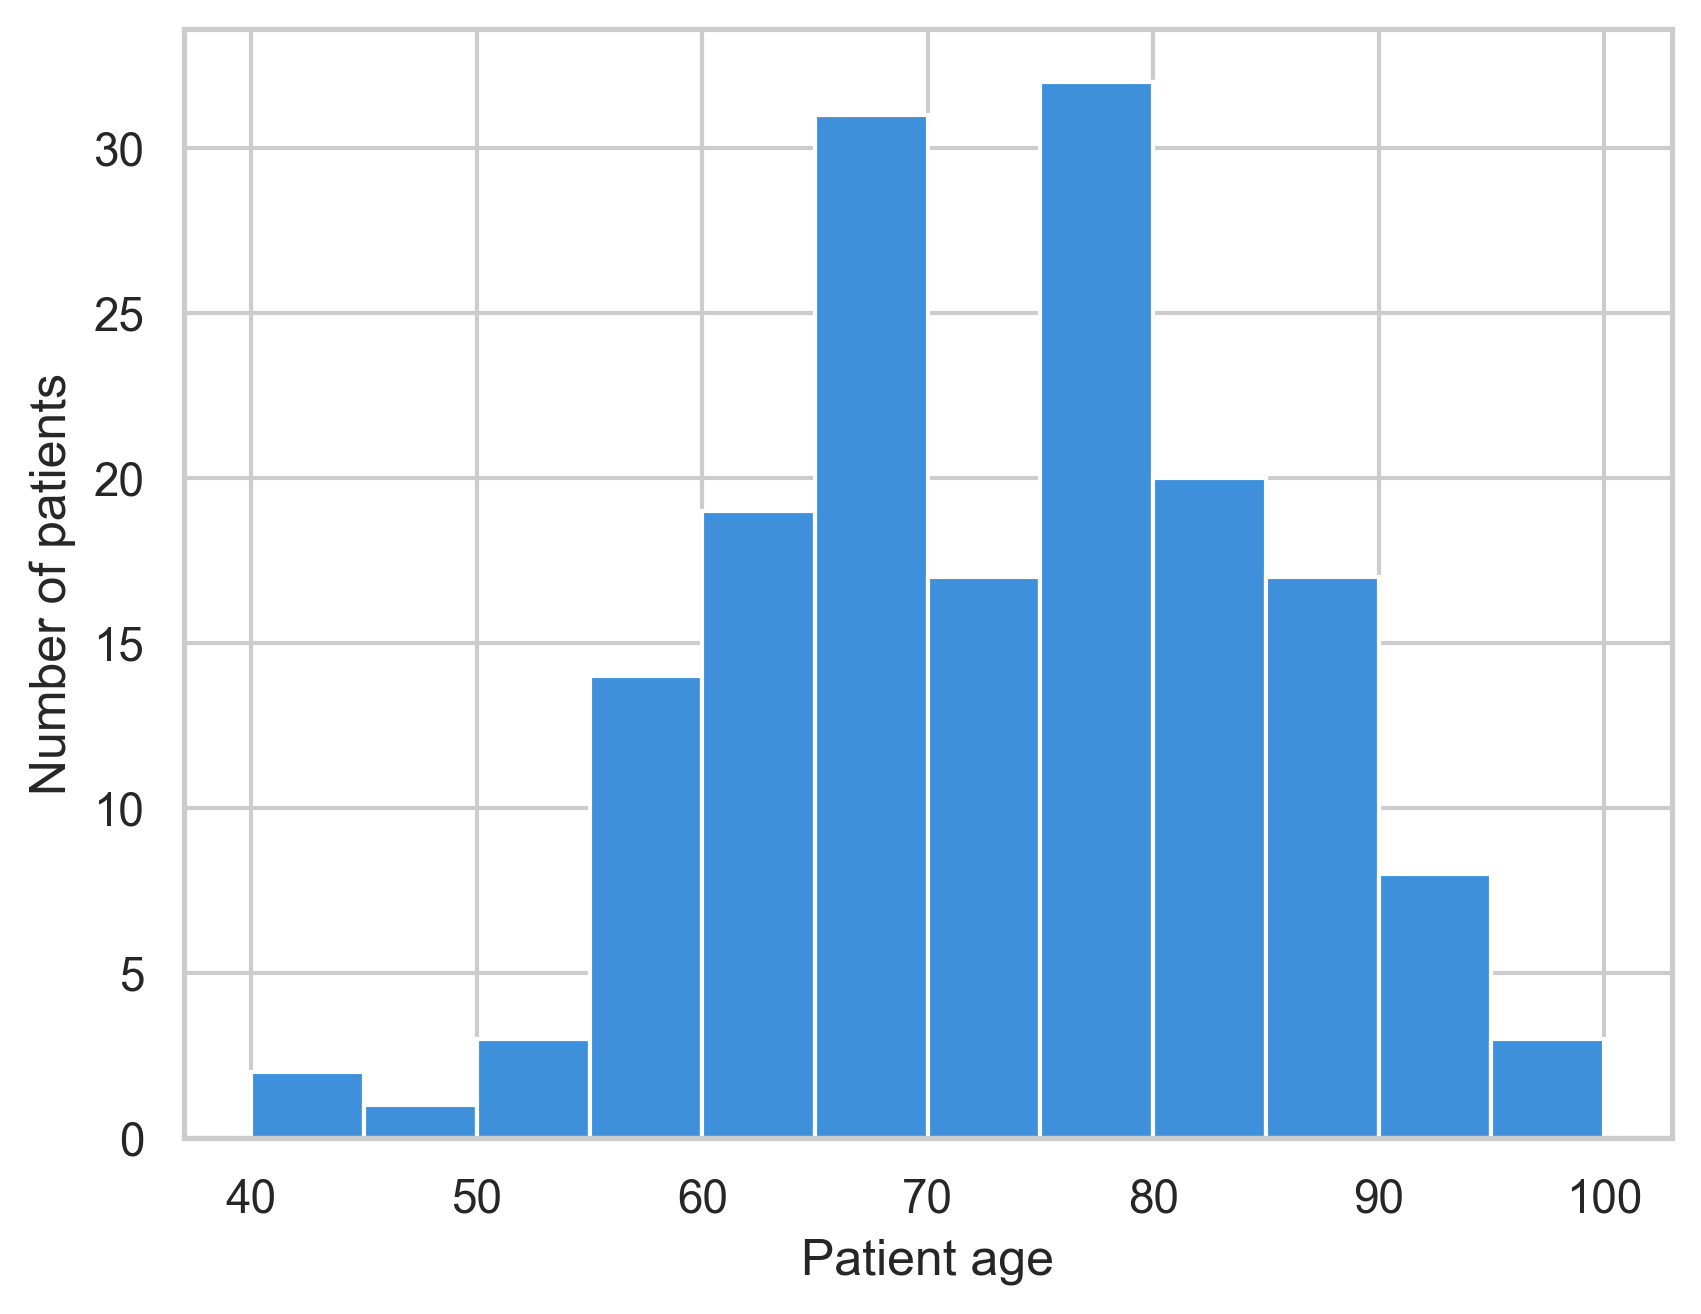

In [17]:
# histogram age of patient
sns.histplot(data=metadata_df, x="patient_age", binrange=(40, 100), binwidth=5, alpha=1)
plt.xlabel("Patient age")
plt.ylabel("Number of patients")

Total records with 1 file: 103


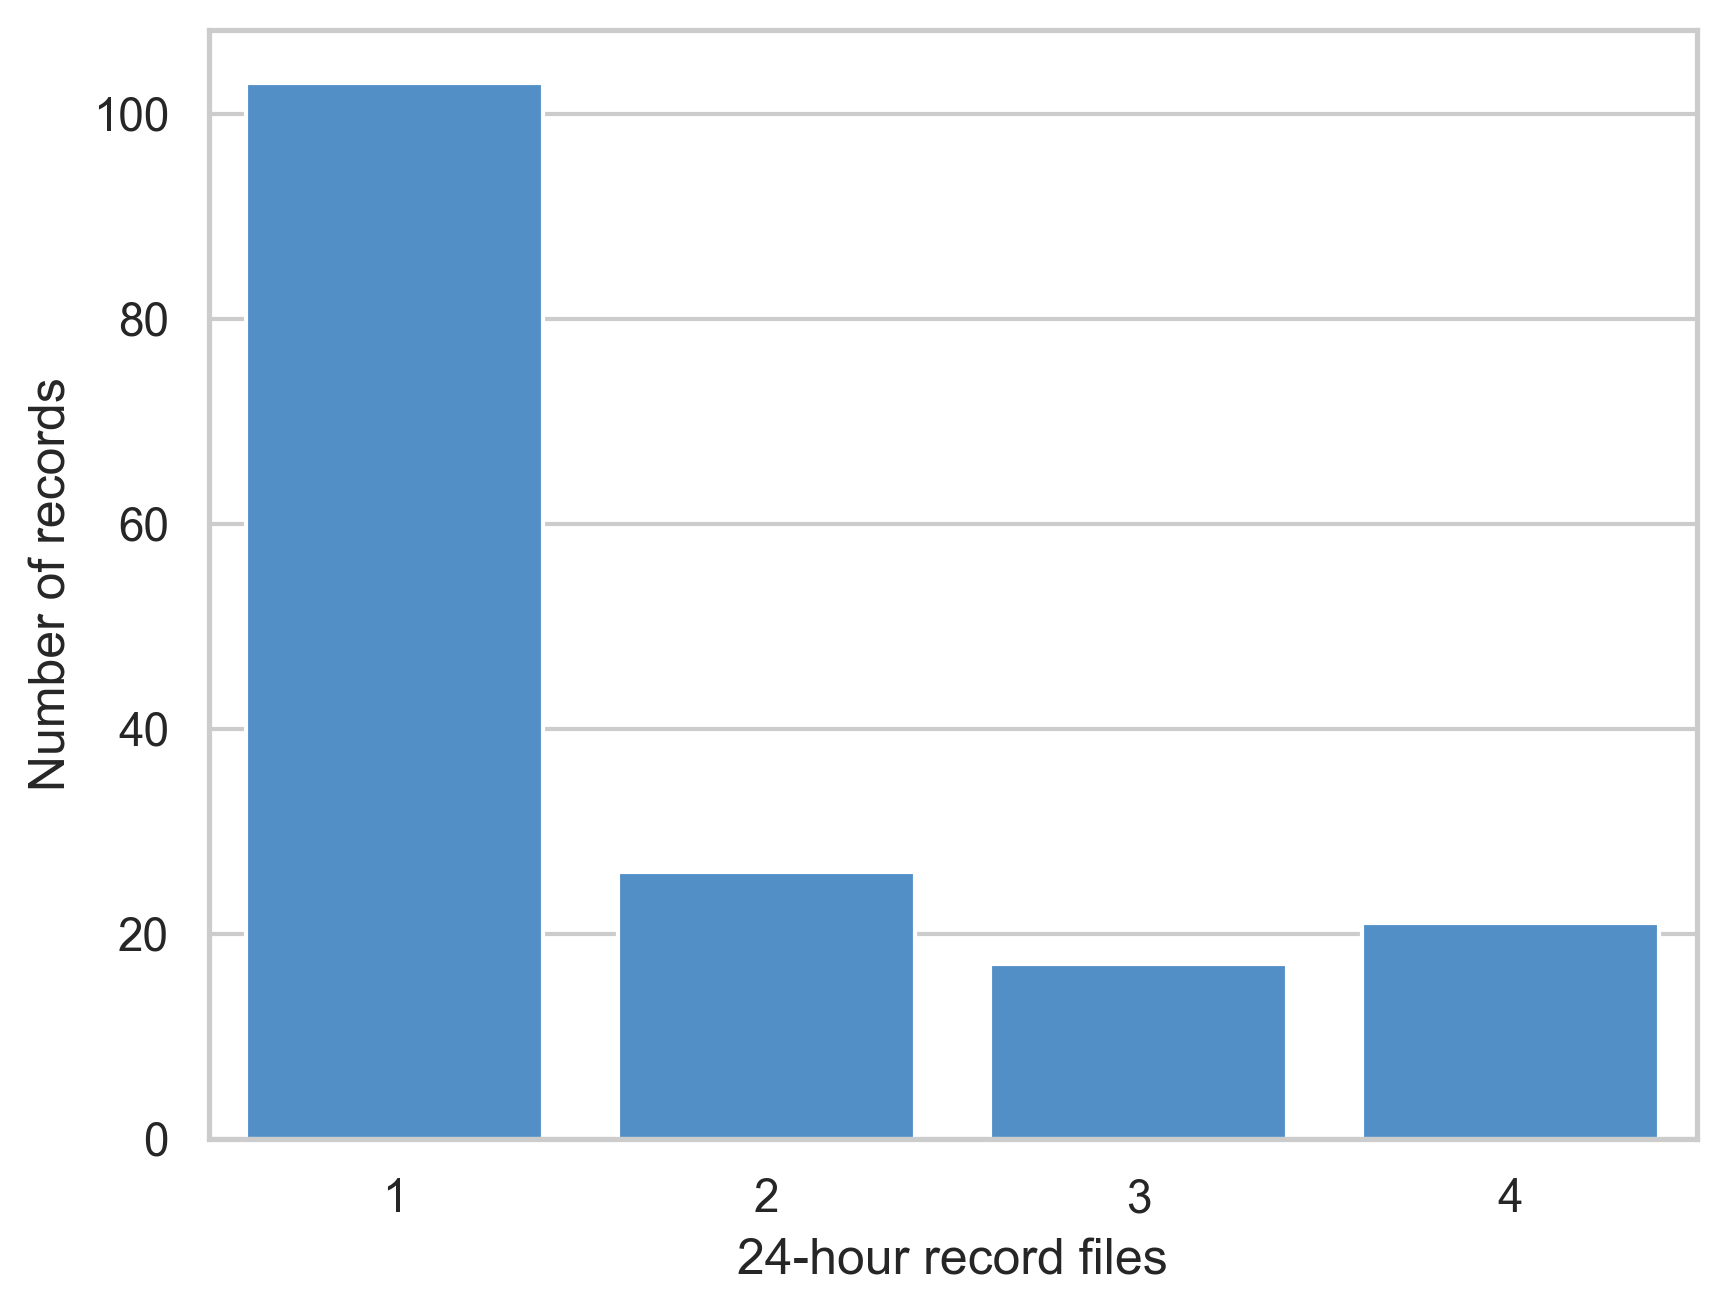

In [21]:
ax = sns.countplot(x="record_files", data=metadata_df, order=sorted(metadata_df["record_files"].unique()), color=PETROFF2021[0])
ax.set(xlabel='24-hour record files', ylabel='Number of records')

print(f"Total records with 1 file: {metadata_df[metadata_df['record_files'] == 1].shape[0]}")

Total AF episodes: 388
Total records with 1 AF episode: 96
Total records with 2 AF episodes: 31


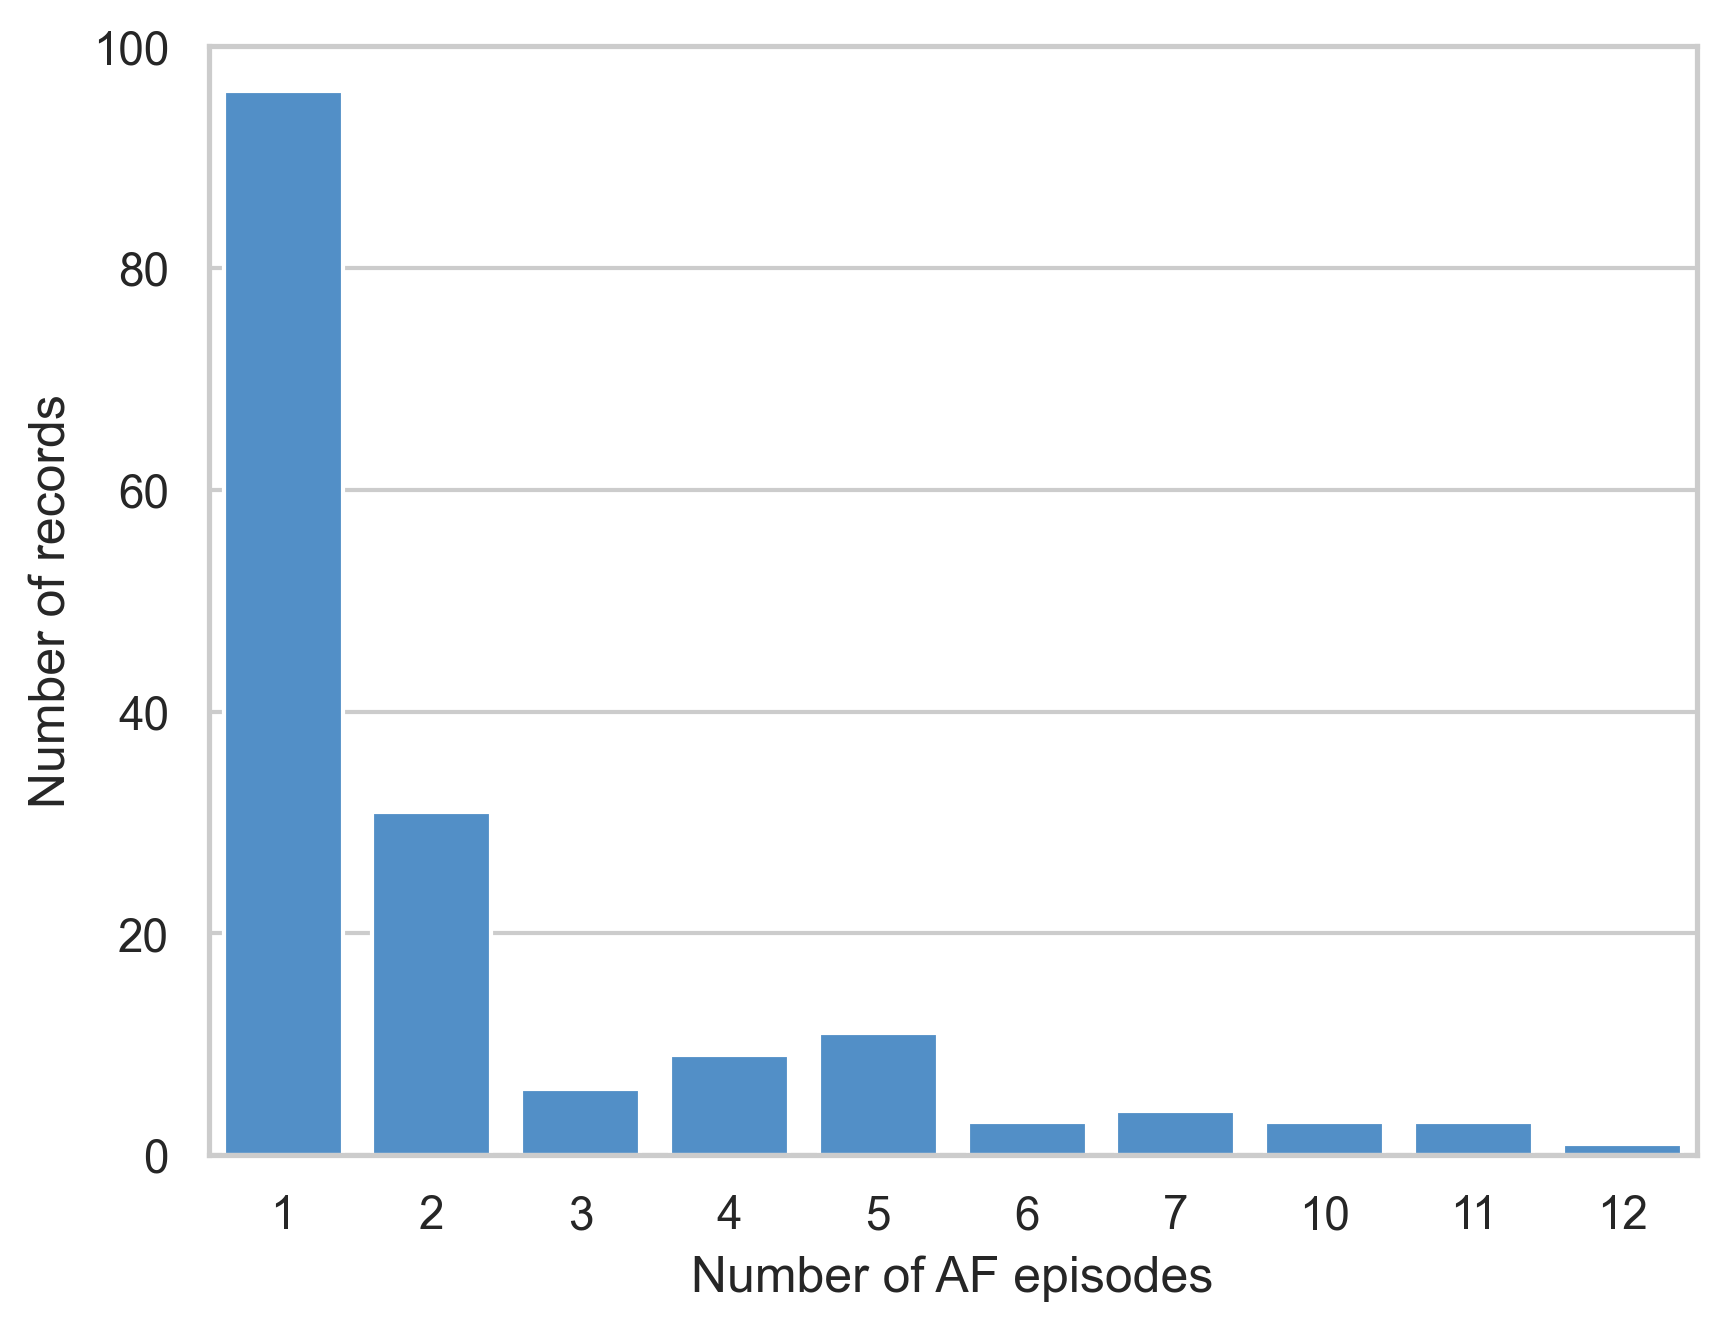

In [22]:
# plot number of AF episodes from num_episodes
num_episodes = []
list_records = metadata_df["record_id"].unique()
for record_id in list_records:
    metadata_record = (metadata_df[metadata_df["record_id"] == record_id]).values[0]
    record_path = Path(hp.RECORDS_PATH, record_id)
    record = Record(record_path, metadata_record)
    num_episodes.append(record.number_of_episodes())


ax = sns.countplot(x=num_episodes, color=PETROFF2021[0], order=sorted(set(num_episodes)))
ax.set(xlabel='Number of AF episodes', ylabel='Number of records')
# y lim 0 100
ax.set(ylim=(0, 100))

print(f"Total AF episodes: {sum(num_episodes)}")
print(f"Total records with 1 AF episode: {num_episodes.count(1)}")
print(f"Total records with 2 AF episodes: {num_episodes.count(2)}")

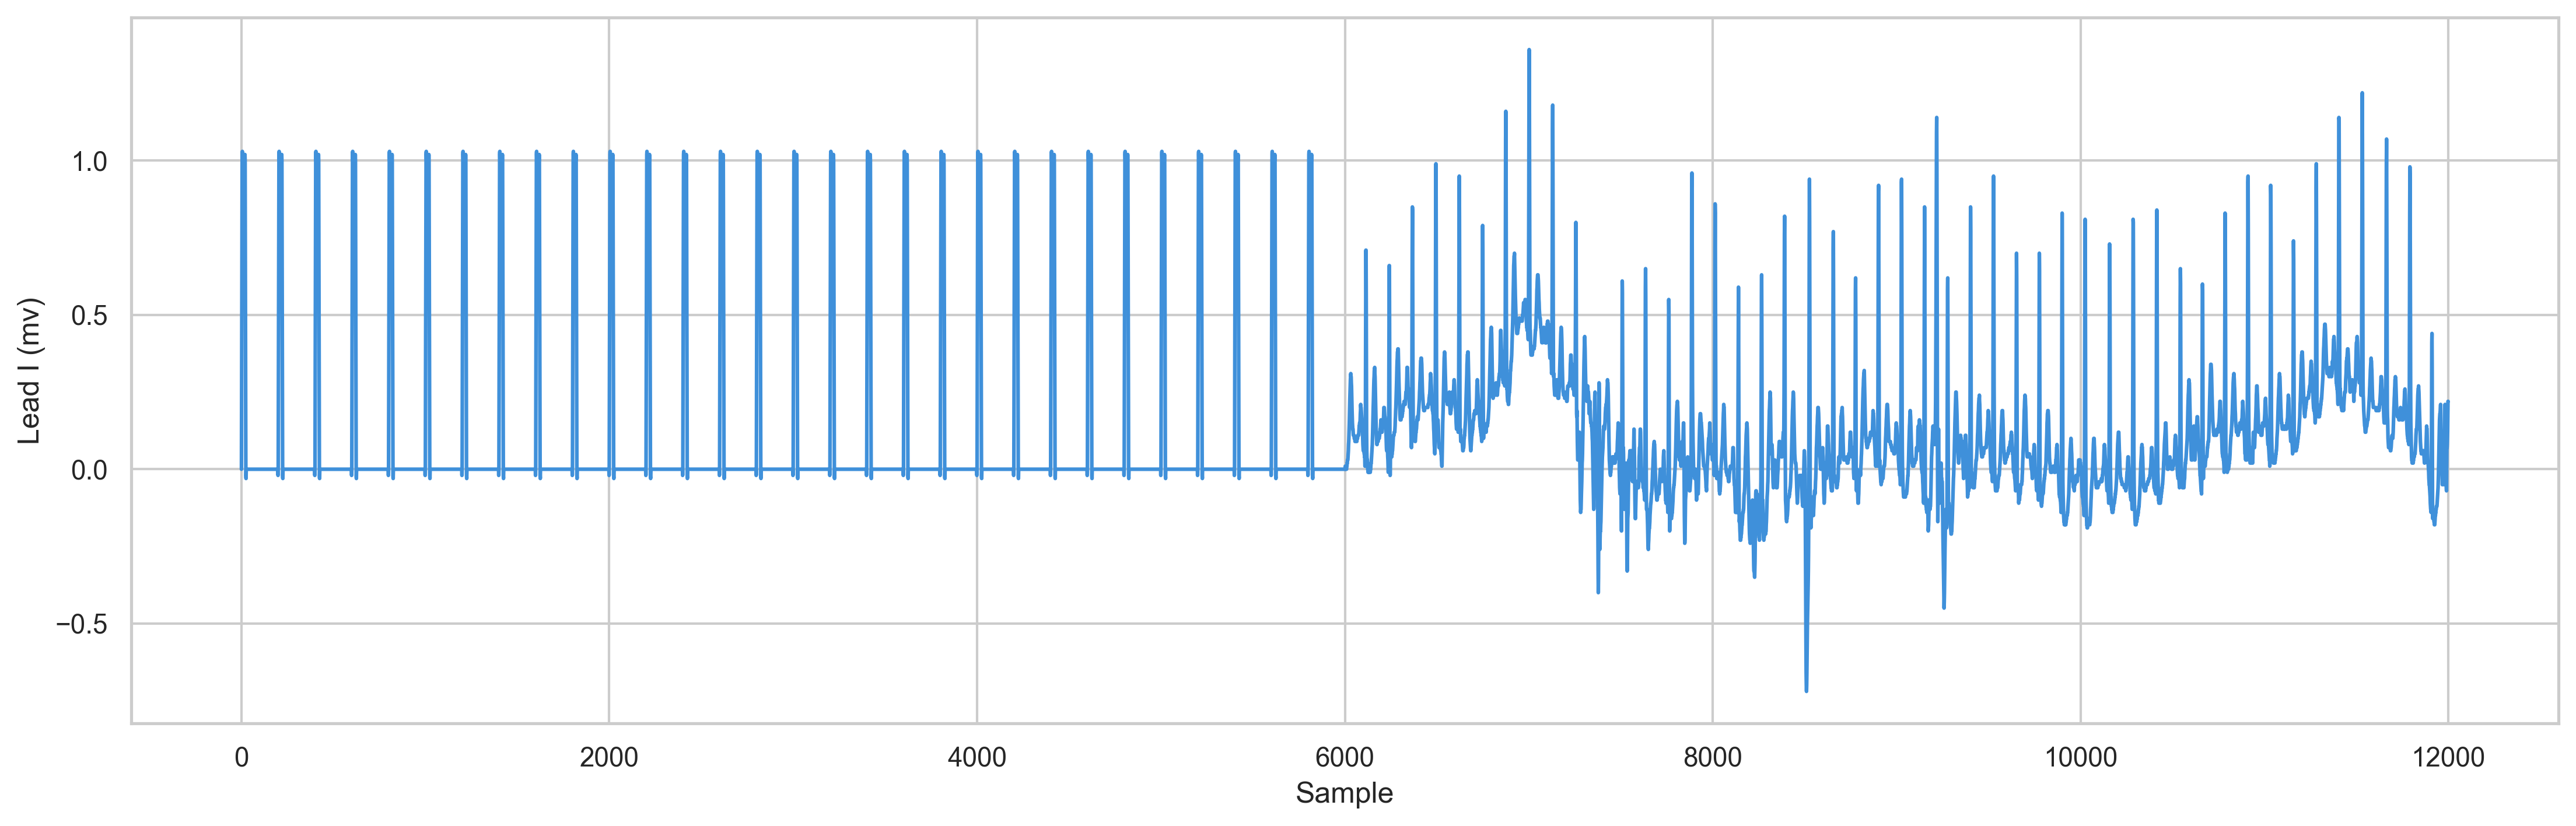

In [23]:
record = create_record("record_077", metadata_df, hp.RECORDS_PATH)
record.load_ecg()

plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 16})
d = record.ecg[0][:60 * 200, 0]
plt.plot(d)
plt.ylabel("Lead I (mv)")
plt.xlabel("Sample")
plt.tight_layout()

/var/folders/tm/1wx9g64j6tbgdkdsc2ppdf240000gq/T/ipykernel_68221/3227564356.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xticks)


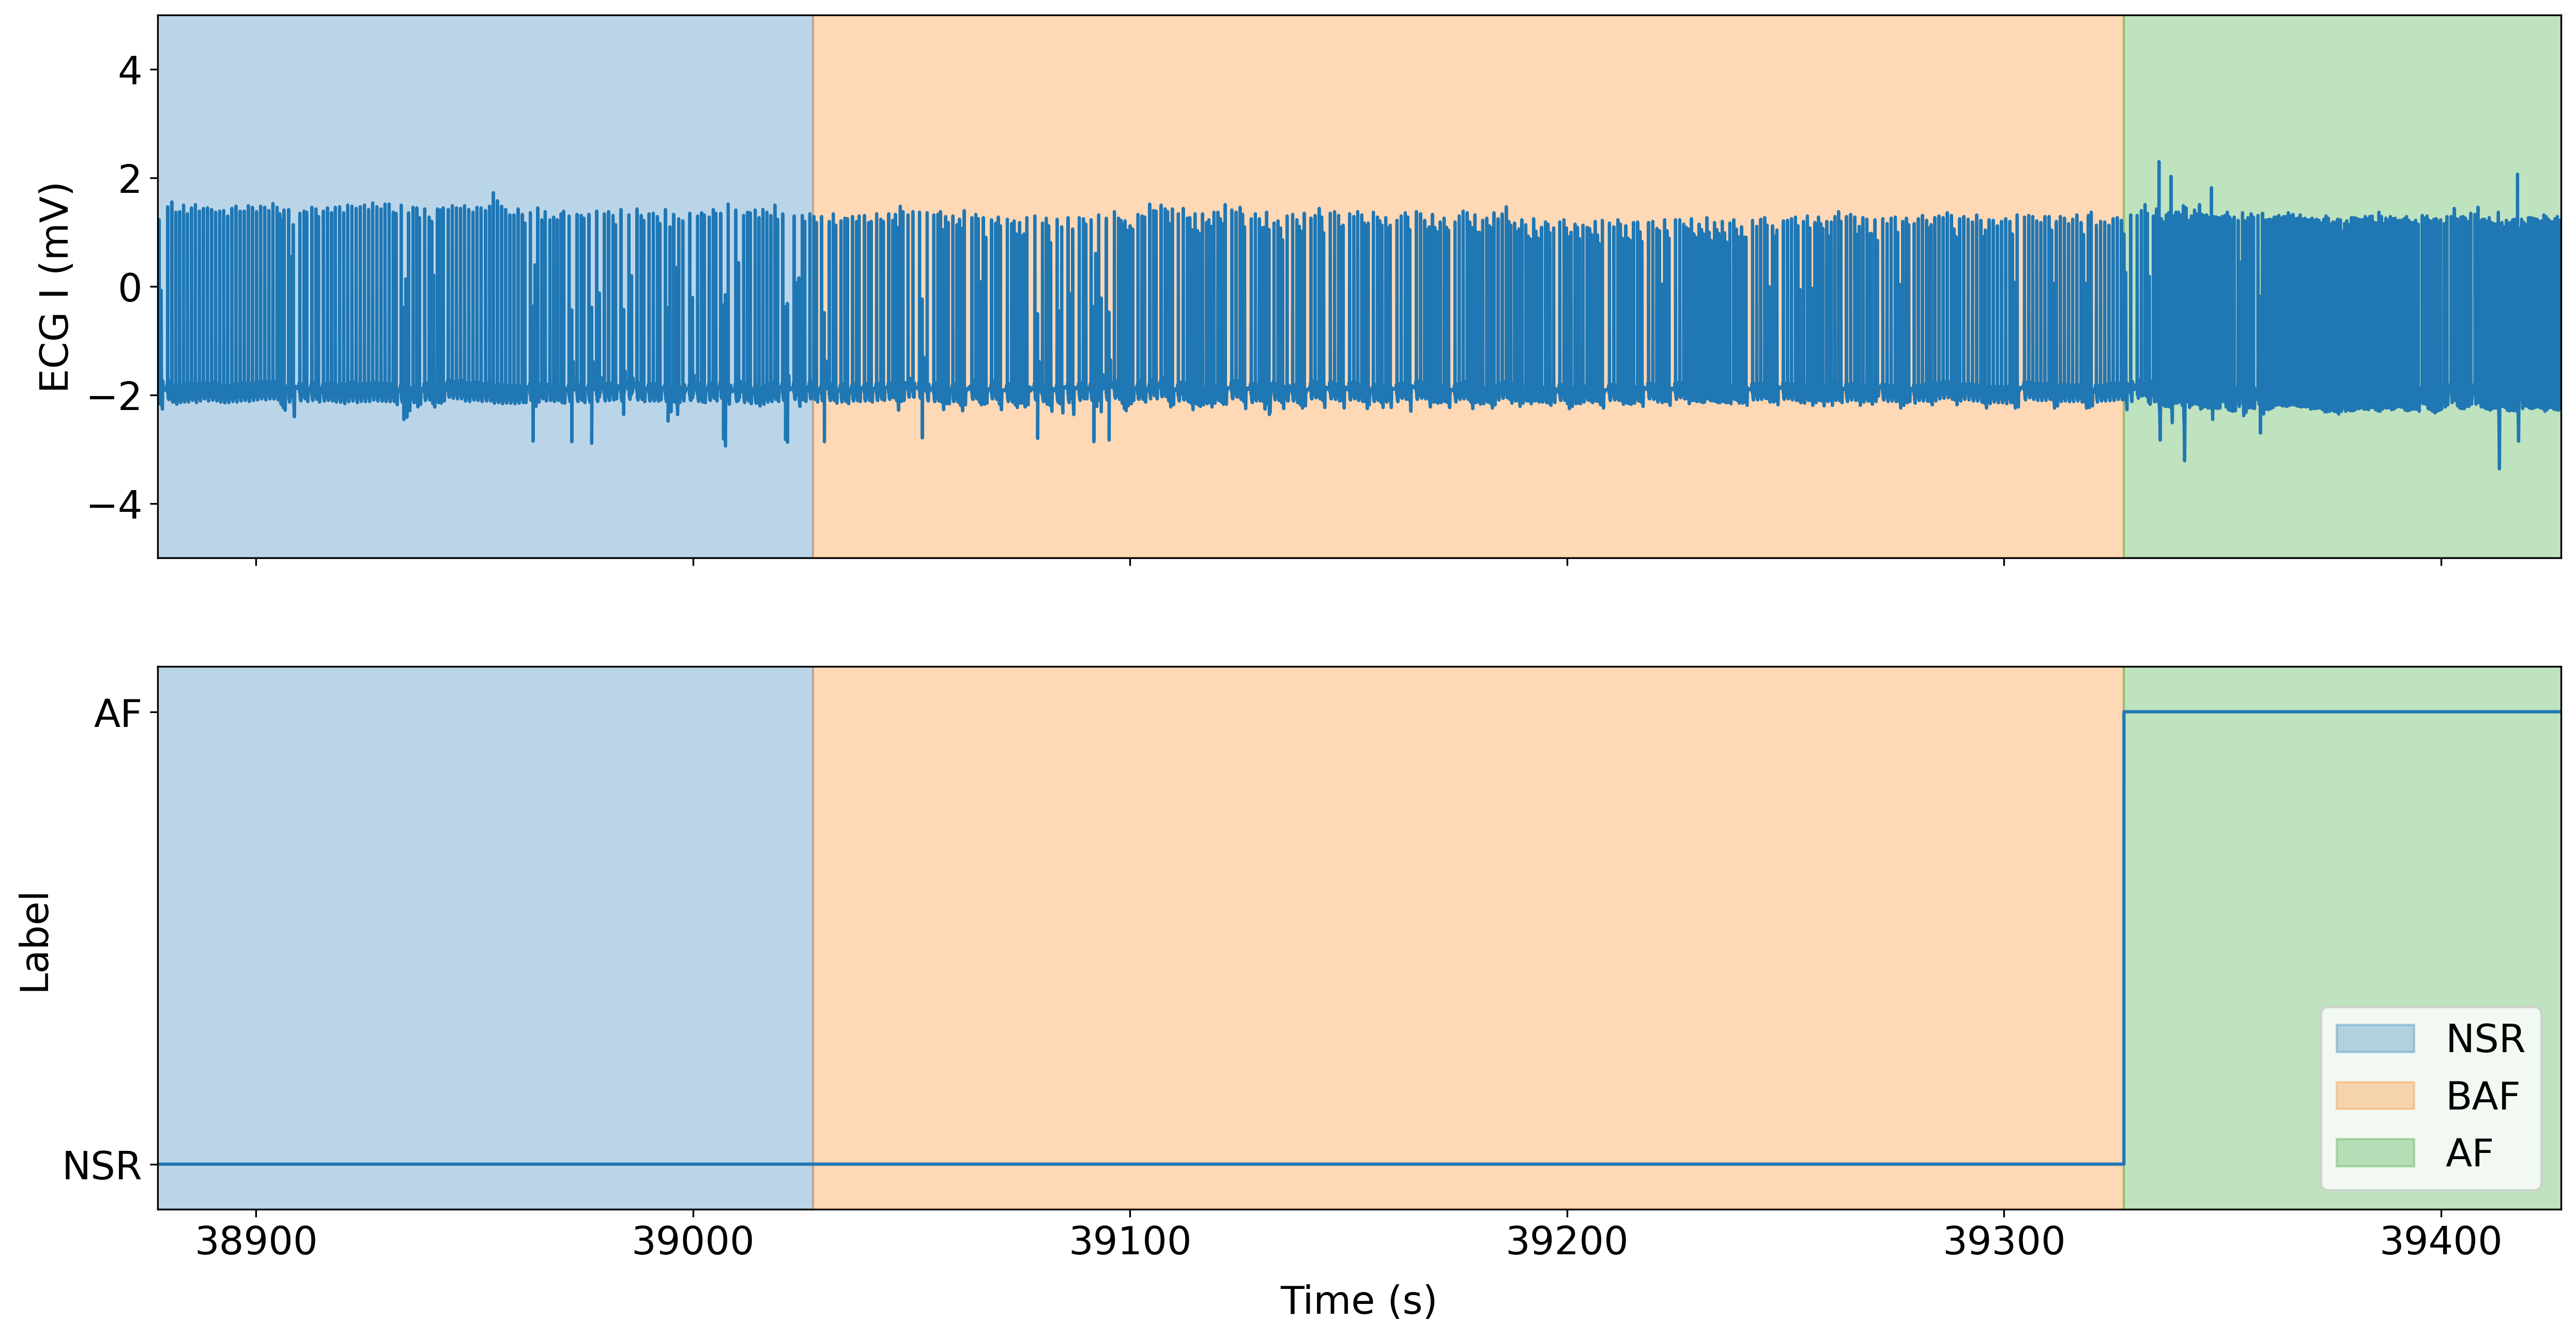

In [8]:
record = create_record("record_000", metadata_df, hp.RECORDS_PATH)
record.load_ecg()

all_ecg = np.concatenate(record.ecg)
all_ecg_labels = np.concatenate(record.ecg_labels)

# set font size
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

ax[0].plot(all_ecg[:, 0])
ax[0].set_ylabel("ECG I (mV)")
ax[1].plot(all_ecg_labels)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_yticks([0, 1])
ax[1].set_yticklabels(["NSR", "AF"])
ax[1].set_ylabel("Label")

ax[1].set_xlabel("Time (s)", labelpad=10)

# color the background of the abnormal regions in red, remaining in green
abnormal_regions_start = np.where(np.diff(all_ecg_labels) == 1)[0]
abnormal_regions_end = np.where(np.diff(all_ecg_labels) == -1)[0]
if len(abnormal_regions_start) > len(abnormal_regions_end):
    abnormal_regions_end = np.append(abnormal_regions_end, len(all_ecg_labels))
elif len(abnormal_regions_start) < len(abnormal_regions_end):
    abnormal_regions_start = np.insert(abnormal_regions_start, 0, 0)

normal_regions_start = abnormal_regions_end
normal_regions_start = np.insert(normal_regions_start, 0, 0)

normal_regions_end = abnormal_regions_start - (300 * 200)
normal_regions_end = np.append(normal_regions_end, len(all_ecg_labels))

baf_start = abnormal_regions_start - (300 * 200)
baf_end = abnormal_regions_start

for start, end in zip(normal_regions_start, normal_regions_end):
    ax[0].axvspan(start, end, alpha=0.3, color="tab:blue", label="NSR")
    ax[1].axvspan(start, end, alpha=0.3, color="tab:blue", label="NSR")

for start, end in zip(baf_start, baf_end):
    ax[0].axvspan(start, end, alpha=0.3, color="tab:orange", label="BAF")
    ax[1].axvspan(start, end, alpha=0.3, color="tab:orange", label="BAF")

for start, end in zip(abnormal_regions_start, abnormal_regions_end):
    ax[0].axvspan(start, end, alpha=0.3, color="tab:green", label="AF")
    ax[1].axvspan(start, end, alpha=0.3, color="tab:green", label="AF")

y = 7865489
plt.xlim(y - 450 * 200, y + 100 * 200)

ax[-1].ticklabel_format(axis="x", style="plain")
xticks = [item.get_text() for item in ax[-1].get_xticklabels()]
xticks = [int(x) // 200 for x in xticks]
ax[1].set_xticklabels(xticks)

ax[0].set_ylim(-5, 5)

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[1].legend(by_label.values(), by_label.keys(), loc="lower right")

# plt.savefig("af_start.svg", format="svg")